In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.isotonic import IsotonicRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from copy import deepcopy


در ابتدا پس از لود کردن دیتاهای بیت کوین، تاریخ داده های را جدا کردیم و به فرمت قابل استفاده تبدیل کردیم.

In [ ]:
# data = pd.read_csv("drive/MyDrive/test/Bitcoin.csv")
data = pd.read_csv("/content/Bitcoin.csv")

def mdy_to_ymd(d):
    return datetime.strptime(d, '%b %d, %Y').strftime('%Y-%m-%d')



def pstr_to_flaot(P):
    return float(("".join(P.split(","))))

data.Date = data.Date.apply(mdy_to_ymd)

data.Price = data.Price.apply(pstr_to_flaot)
data.Open = data.Open.apply(pstr_to_flaot)
data.High = data.High.apply(pstr_to_flaot)
data.Low = data.Low.apply(pstr_to_flaot)

def vol_str_to_int(vol):
    return vol[:-1]

data["Vol."] = data["Vol."].apply(vol_str_to_int)

l = []
for i in data.index:
    try:
        data.iloc[i, 5] = 1000*float(data.iloc[i, 5])
    except ValueError:
        l.append(i)
for i in l:
    data.iloc[i, 5] = 0
data

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-05-01,57807.1,57719.1,58449.4,57029.5,63410,0.15%
1,2021-04-30,57720.3,53562.3,57925.6,53088.7,103740,7.77%
2,2021-04-29,53560.8,54838.6,55173.7,52400.0,83900,-2.34%
3,2021-04-28,54841.4,55036.0,56419.9,53876.4,86960,-0.35%
4,2021-04-27,55036.5,54011.1,55427.8,53345.0,84080,1.88%
...,...,...,...,...,...,...,...
3936,2010-07-22,0.1,0.1,0.1,0.1,2160,0.00%
3937,2010-07-21,0.1,0.1,0.1,0.1,580,0.00%
3938,2010-07-20,0.1,0.1,0.1,0.1,260,0.00%
3939,2010-07-19,0.1,0.1,0.1,0.1,570,0.00%


سپس داده های آموزش و تست را جداسازی کرده و به صورت نامپای دراوردیم.

In [ ]:
data_test = data.iloc[:486].to_numpy()
data_train = data.iloc[486:].to_numpy()
x_train, y_train = data_train[1:, 2:6], data_train[:-1, 1]
x_test, y_test = data_test[1:, 2:6], data_test[:-1, 1]

y_test_copy = deepcopy(y_test)
y_train_copy = deepcopy(y_train)

در باکس بعدی توسط ۱۰ رگرسور، سعی کردیم که یک پیش بینی برروی  داده های تست و آموزش انجام دهیم. همانطور که مشاهده میشود، مقادیر خطای کمترین مربعات و دقت ( بصورتی که در صورت سوال خواسته شده) برای هر رگرسور نمایش داده شده است.

In [ ]:
LinearR = LinearRegression().fit(x_train, y_train)
y_pred = LinearR.predict(x_test)
print( "1.LinearRegression accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  LinearRegression RMSE = ", mean_squared_error(y_pred, y_test))


SVM = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1000)).fit(x_train, y_train)
y_pred = SVM.predict(x_test)
print( "\n2.SVM accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  SVM RMSE = ", mean_squared_error(y_pred, y_test))


KNR = KNeighborsRegressor(n_neighbors= 5).fit(x_train, y_train)
y_pred = KNR.predict(x_test)
print( "\n3.KNeighborsRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  KNeighborsRegressor RMSE = ", mean_squared_error(y_pred, y_test))


RFR = RandomForestRegressor(max_depth= 5).fit(x_train, y_train)
y_pred = RFR.predict(x_test)
print( "\n4.RandomForestRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  RandomForestRegressor RMSE = ", mean_squared_error(y_pred, y_test))


DTR = DecisionTreeRegressor().fit(x_train, y_train)
y_pred = DTR.predict(x_test)
print( "\n5.DecisionTreeRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  DecisionTreeRegressor RMSE = ", mean_squared_error(y_pred, y_test))


SGDR = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)).fit(x_train, y_train)
y_pred = SGDR.predict(x_test)
print( "\n6.SGDRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  SGDRegressor RMSE = ", mean_squared_error(y_pred, y_test))


isoR = IsotonicRegression().fit(x_train[:, 0], y_train)
y_pred = isoR.predict(x_test[:, 0])
print( "\n7.IsotonicRegression accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
# print("  IsotonicRegression RMSE = ", mean_squared_error(y_pred, y_test))


kernel = DotProduct() + WhiteKernel()
GPR = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(x_train, y_train)
y_pred = GPR.predict(x_test)
print( "\n8.GaussianProcessRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  GaussianProcessRegressor RMSE = ", mean_squared_error(y_pred, y_test))


MLPR = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
y_pred = MLPR.predict(x_test)
print( "\n9.MLPRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  MLPRegressor RMSE = ", mean_squared_error(y_pred, y_test))


RCVR = RidgeCV().fit(x_train, y_train)
y_pred = RCVR.predict(x_test)
print( "\n10.Ridge with Cross Validation accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("  Ridge with Cross Validation RMSE = ", mean_squared_error(y_pred, y_test))


1.LinearRegression accuracy =  83.29896907216495
  LinearRegression RMSE =  1463069.6228656603

2.SVM accuracy =  83.91752577319588
  SVM RMSE =  1426980.4664711824

3.KNeighborsRegressor accuracy =  18.969072164948454
  KNeighborsRegressor RMSE =  291391489.63901275

4.RandomForestRegressor accuracy =  60.0
  RandomForestRegressor RMSE =  252255787.0021648

5.DecisionTreeRegressor accuracy =  38.96907216494846
  DecisionTreeRegressor RMSE =  246340578.5049897

6.SGDRegressor accuracy =  81.03092783505154
  SGDRegressor RMSE =  1692035.3097700984

7.IsotonicRegression accuracy =  52.57731958762887

8.GaussianProcessRegressor accuracy =  83.50515463917526
  GaussianProcessRegressor RMSE =  1460421.598415503

9.MLPRegressor accuracy =  71.54639175257732
  MLPRegressor RMSE =  2720706.3529329826

10.Ridge with Cross Validation accuracy =  82.88659793814433
  Ridge with Cross Validation RMSE =  1463812.0173785838


در این مرحله قصد داریم با کمک مدل بازگشتی شبکه عصبی برای قیمت داده های بیتکوین پیش بینی انجام دهیم. برای این کار ابتدا داده ها را استاندارد میکنیم و سپس به صورت ورودی شبکه تغییر میدهیم. در نهایت شبکه را روی مجموعه داده های ساخته شده جدید آموزش میدهیم

In [ ]:
training_set = data.iloc[486:, 1:2].values
test_set = data.iloc[:486, 1:2].values

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
y_train = []
for i in range(60, 3455):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

dataset_train = data.iloc[486:, 1:2]
dataset_test = data.iloc[:486, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 546):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 20, batch_size = 64)

Epoch 1/20
54/54 [==============================] - 32s 150ms/step - loss: 0.0108
Epoch 2/20
54/54 [==============================] - 8s 149ms/step - loss: 0.0019
Epoch 3/20
54/54 [==============================] - 8s 150ms/step - loss: 0.0018
Epoch 4/20
54/54 [==============================] - 8s 148ms/step - loss: 0.0022
Epoch 5/20
54/54 [==============================] - 8s 147ms/step - loss: 0.0013
Epoch 6/20
54/54 [==============================] - 8s 147ms/step - loss: 0.0018
Epoch 7/20
54/54 [==============================] - 8s 148ms/step - loss: 0.0014
Epoch 8/20
54/54 [==============================] - 8s 147ms/step - loss: 0.0012
Epoch 9/20
54/54 [==============================] - 8s 148ms/step - loss: 9.4258e-04
Epoch 10/20
54/54 [==============================] - 8s 148ms/step - loss: 0.0010
Epoch 11/20
54/54 [==============================] - 8s 146ms/step - loss: 0.0013
Epoch 12/20
54/54 [==============================] - 8s 147ms/step - loss: 9.0975e-04
Epoch 13/20
54/5

No handles with labels found to put in legend.


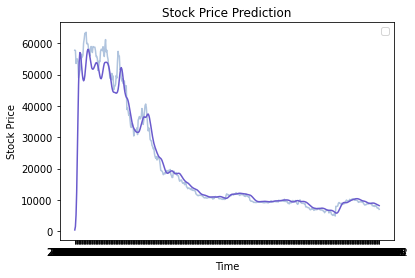

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(data.loc[:485, 'Date'],dataset_test.values, color='lightsteelblue')
plt.plot(data.loc[:485, 'Date'],predicted_stock_price, color='slateblue')
plt.title('BitCoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('BitCoin Price')
# plt.legend()
plt.show()

در این بخش میخواهیم از الگوریتم های انسمبل استفاده کنیم:


*   Voting
*   Bagging
*   Boosting



### Voting Regressor

In [ ]:
y_train = y_train_copy
y_test = y_test_copy
stimators = [('svm', SVM), ('lr', LinearR), ("ridge", RCVR), ("MLP", MLPR), ("sgdr", SGDR)]
VR = VotingRegressor([('lr', LinearR), ('svm', SVM)]).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "VotingRegressor with 2 regressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("VotingRegressor with 2 regressor RMSE = ", mean_squared_error(y_pred, y_test))

VR = VotingRegressor(stimators).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "\nVotingRegressor with 5 regressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("VotingRegressor with 5 regressor RMSE = ", mean_squared_error(y_pred, y_test))

VotingRegressor with 2 regressor accuracy =  83.91752577319588
VotingRegressor with 2 regressor RMSE =  1440921.2983758245

VotingRegressor with 5 regressor accuracy =  82.88659793814433
VotingRegressor with 5 regressor RMSE =  1560373.2857748242


### Bagging Regressor

In [ ]:
VR = BaggingRegressor(SVM).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "BaggingRegressor with SVM base accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("BaggingRegressor with SVM base RMSE = ", mean_squared_error(y_pred, y_test))

VR = BaggingRegressor(LinearR).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "\nBaggingRegressor with LinearR base accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("BaggingRegressor with LinearR base RMSE = ", mean_squared_error(y_pred, y_test))

VR = BaggingRegressor(RCVR).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "\nBaggingRegressor with RidgeR base accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("BaggingRegressor with RidgeR base RMSE = ", mean_squared_error(y_pred, y_test))

VR = BaggingRegressor(MLPR).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "\nBaggingRegressor with MLPR base accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("BaggingRegressor with MLPR base RMSE = ", mean_squared_error(y_pred, y_test))

VR = BaggingRegressor(SGDR).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "\nBaggingRegressor with SGDR base accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("BaggingRegressor with SGDR base RMSE = ", mean_squared_error(y_pred, y_test))

BaggingRegressor with SVM base accuracy =  83.91752577319588
BaggingRegressor with SVM base RMSE =  1429157.0507796134

BaggingRegressor with LinearR base accuracy =  83.29896907216495
BaggingRegressor with LinearR base RMSE =  1466579.7205911116

BaggingRegressor with RidgeR base accuracy =  83.91752577319588
BaggingRegressor with RidgeR base RMSE =  1481892.5382141047

BaggingRegressor with MLPR base accuracy =  80.41237113402062
BaggingRegressor with MLPR base RMSE =  1906329.258843643

BaggingRegressor with SGDR base accuracy =  81.44329896907216
BaggingRegressor with SGDR base RMSE =  1646487.401766922


### Boosting Regressor

In [ ]:
VR = AdaBoostRegressor(SVM).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "AdaBoostRegressor with SVM base accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("AdaBoostRegressor with SVM base RMSE = ", mean_squared_error(y_pred, y_test))

VR = AdaBoostRegressor(LinearR).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "\nAdaBoostRegressor with LinearR base accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("AdaBoostRegressor with LinearR base RMSE = ", mean_squared_error(y_pred, y_test))

VR = AdaBoostRegressor(RCVR).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "\nAdaBoostRegressor with RidgeR base accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("AdaBoostRegressor with RidgeR base RMSE = ", mean_squared_error(y_pred, y_test))

VR = AdaBoostRegressor(MLPR).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "\nAdaBoostRegressor with MLPR base accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("AdaBoostRegressor with MLPR base RMSE = ", mean_squared_error(y_pred, y_test))

VR = AdaBoostRegressor(SGDR).fit(x_train, y_train)
y_pred = VR.predict(x_test)
print( "\nAdaBoostRegressor with SGDR base accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("AdaBoostRegressor with SGDR base RMSE = ", mean_squared_error(y_pred, y_test))

AdaBoostRegressor with SVM base accuracy =  83.50515463917526
AdaBoostRegressor with SVM base RMSE =  1501224.4250258896

AdaBoostRegressor with LinearR base accuracy =  79.79381443298969
AdaBoostRegressor with LinearR base RMSE =  1831821.114212425

AdaBoostRegressor with RidgeR base accuracy =  81.64948453608247
AdaBoostRegressor with RidgeR base RMSE =  1610028.1702815546

AdaBoostRegressor with MLPR base accuracy =  74.63917525773196
AdaBoostRegressor with MLPR base RMSE =  2182791.5036949837

AdaBoostRegressor with SGDR base accuracy =  82.68041237113401
AdaBoostRegressor with SGDR base RMSE =  1452505.831113617


همانگونه که دیده میشود عملکرد  بگینگ در مقایسه با بوستینگ بطور جداگانه کمی بهتر بوده است. همینطور استفاده از ووتینگ نیز باعث افزایش دقت شده است.

### Random Forest Method

در اینجا متود رندوم فارست برای پیش بینی قیمت استفاده کردیم و همانطور که دیده میشود، افزودن ماکسیمم عمق ۵ به درختان، باعث بهبود عملکرد خواهد شد

In [ ]:
RFR = RandomForestRegressor().fit(x_train, y_train)
y_pred = RFR.predict(x_test)
print( "RandomForestRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("RandomForestRegressor RMSE = ", mean_squared_error(y_pred, y_test))

RFR = RandomForestRegressor(max_depth=5).fit(x_train, y_train)
y_pred = RFR.predict(x_test)
print( "\nRandomForestRegressor with maximum depth 5 accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("RandomForestRegressor with maximum depth 5 RMSE = ", mean_squared_error(y_pred, y_test))



RandomForestRegressor accuracy =  55.25773195876289
RandomForestRegressor RMSE =  250118725.77573574

RandomForestRegressor with maximum depth5 accuracy =  60.20618556701031
RandomForestRegressor with maximum depth 5 RMSE =  250047783.03336406


در این قسمت سعی کردیم ابتدا یک ستون شامل داده هایی درست کنیم که نشان دهنده بالاتر رفتن یا پایین آمدن قیمت نسبت به روز قبلی باشند، در این صورت، میتوان مساله را به یک مساله کلاسبندی تبدیل کرد که وظیفه مدل شبکه عصبی، پیش بینی بالارفتن یا پایین آمدن قیمت در روز بعدی باشد(کلاسبندی)

In [ ]:
data["change_sign"] = np.where( (data.Price - data.Open) >= 0, 1, 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3941 non-null   object 
 1   Price        3941 non-null   float64
 2   Open         3941 non-null   float64
 3   High         3941 non-null   float64
 4   Low          3941 non-null   float64
 5   Vol.         3941 non-null   object 
 6   Change %     3941 non-null   object 
 7   change_sign  3941 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 246.4+ KB


In [ ]:
training_set = data.iloc[486:, 1:2].values
test_set = data.iloc[:486, 1:2].values
y_test = data.iloc[60:486, -1].values
y_train = data.iloc[546:, -1].values


sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

X_train = []
# y_train = []
for i in range(60, 3455):
    X_train.append(training_set_scaled[i-60:i, 0])
    # y_train.append(training_set_scaled[i, 7])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

dataset_train = data.iloc[486:, 1:2]
dataset_test = data.iloc[:486, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
# y_test = []
for i in range(60, 546):
    X_test.append(inputs[i-60:i, 0])
    # y_test.append(training_set_scaled[i, 7])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1,  activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 20, batch_size = 64)

Epoch 1/20
54/54 [==============================] - 16s 149ms/step - loss: 0.2446 - accuracy: 0.5866
Epoch 2/20
54/54 [==============================] - 8s 148ms/step - loss: 0.2421 - accuracy: 0.5812
Epoch 3/20
54/54 [==============================] - 8s 146ms/step - loss: 0.2418 - accuracy: 0.5868
Epoch 4/20
54/54 [==============================] - 8s 148ms/step - loss: 0.2406 - accuracy: 0.5819
Epoch 5/20
54/54 [==============================] - 8s 148ms/step - loss: 0.2391 - accuracy: 0.5985
Epoch 6/20
54/54 [==============================] - 8s 147ms/step - loss: 0.2401 - accuracy: 0.5851
Epoch 7/20
54/54 [==============================] - 8s 147ms/step - loss: 0.2395 - accuracy: 0.5743
Epoch 8/20
54/54 [==============================] - 8s 147ms/step - loss: 0.2429 - accuracy: 0.5809
Epoch 9/20
54/54 [==============================] - 8s 147ms/step - loss: 0.2390 - accuracy: 0.5977
Epoch 10/20
54/54 [==============================] - 8s 149ms/step - loss: 0.2377 - accuracy: 0.611

In [ ]:
pip install ta

<div style="text-align:right"> .در این قسمت دو اندیکاتور را به عنوان ویژگی به مجموعه داده ها اضافه کردیم.همان گونه ک مشاهده می کنید اضافه کردن دو اندیکاتور هم می توان اثر افزایشی هرچند اندکی بر دقت داشته باشد</div>

In [ ]:
import ta

def add_Indicators_data(data): # data is a pandas.DataFrame
    data["CCI"] = ta.trend.CCIIndicator(high = data["High"], low = data["Low"], close = data["Price"], window = 20, constant = 0.015, fillna = True).cci() 
    data["SMA"] = ta.trend.sma_indicator(data["Price"], window=53, fillna=True)
    return data

indicators = add_Indicators_data(data).drop(["Change %"], axis=1)
indicators

,Date,Price,Open,High,Low,Vol.,CCI,SMA
0,2021-05-01,57807.1,57719.1,58449.4,57029.5,63410,0.000000,57807.100000
1,2021-04-30,57720.3,53562.3,57925.6,53088.7,103740,-66.666667,57763.700000
2,2021-04-29,53560.8,54838.6,55173.7,52400.0,83900,-100.000000,56362.733333
3,2021-04-28,54841.4,55036.0,56419.9,53876.4,86960,-32.773700,55982.400000
4,2021-04-27,55036.5,54011.1,55427.8,53345.0,84080,-47.407194,55793.220000
...,...,...,...,...,...,...,...,...
3936,2010-07-22,0.1,0.1,0.1,0.1,2160,35.087719,0.100000
3937,2010-07-21,0.1,0.1,0.1,0.1,580,35.087719,0.100000
3938,2010-07-20,0.1,0.1,0.1,0.1,260,35.087719,0.100000
3939,2010-07-19,0.1,0.1,0.1,0.1,570,35.087719,0.100000


In [ ]:
data_test = indicators.iloc[:486].to_numpy()
data_train = indicators.iloc[486:].to_numpy()
x_train, y_train = data_train[1:, 2:], data_train[:-1, 1]
x_test, y_test = data_test[1:, 2:], data_test[:-1, 1]

In [ ]:
LinearR = LinearRegression().fit(x_train, y_train)
y_pred = LinearR.predict(x_test)
print( "1.LinearRegression accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  LinearRegression RMSE = ", mean_squared_error(y_pred, y_test))


SVM = make_pipeline(StandardScaler(), SVR(kernel='linear',C=1000)).fit(x_train, y_train)
y_pred = SVM.predict(x_test)
print( "\n2.SVM accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  SVM RMSE = ", mean_squared_error(y_pred, y_test))


KNR = KNeighborsRegressor(n_neighbors= 5).fit(x_train, y_train)
y_pred = KNR.predict(x_test)
print( "\n3.KNeighborsRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  KNeighborsRegressor RMSE = ", mean_squared_error(y_pred, y_test))


RFR = RandomForestRegressor(max_depth= 5).fit(x_train, y_train)
y_pred = RFR.predict(x_test)
print( "\n4.RandomForestRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  RandomForestRegressor RMSE = ", mean_squared_error(y_pred, y_test))


DTR = DecisionTreeRegressor().fit(x_train, y_train)
y_pred = DTR.predict(x_test)
print( "\n5.DecisionTreeRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  DecisionTreeRegressor RMSE = ", mean_squared_error(y_pred, y_test))


SGDR = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)).fit(x_train, y_train)
y_pred = SGDR.predict(x_test)
print( "\n6.SGDRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  SGDRegressor RMSE = ", mean_squared_error(y_pred, y_test))


isoR = IsotonicRegression().fit(x_train[:, 0], y_train)
y_pred = isoR.predict(x_test[:, 0])
print( "\n7.IsotonicRegression accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
# print("  IsotonicRegression RMSE = ", mean_squared_error(y_pred, y_test))


kernel = DotProduct() + WhiteKernel()
GPR = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(x_train, y_train)
y_pred = GPR.predict(x_test)
print( "\n8.GaussianProcessRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  GaussianProcessRegressor RMSE = ", mean_squared_error(y_pred, y_test))


MLPR = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
y_pred = MLPR.predict(x_test)
print( "\n9.MLPRegressor accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100 )
print("  MLPRegressor RMSE = ", mean_squared_error(y_pred, y_test))


RCVR = RidgeCV().fit(x_train, y_train)
y_pred = RCVR.predict(x_test)
print( "\n10.Ridge with Cross Validation accuracy = ", np.mean(np.abs(y_pred-y_test)/y_test < 0.05)*100)
print("  Ridge with Cross Validation RMSE = ", mean_squared_error(y_pred, y_test))


1.LinearRegression accuracy =  83.29896907216495
  LinearRegression RMSE =  1328557.80847682

2.SVM accuracy =  83.29896907216495
  SVM RMSE =  1345198.342708777

3.KNeighborsRegressor accuracy =  21.030927835051546
  KNeighborsRegressor RMSE =  285444396.8386928

4.RandomForestRegressor accuracy =  58.35051546391753
  RandomForestRegressor RMSE =  254660594.2809811

5.DecisionTreeRegressor accuracy =  32.78350515463917
  DecisionTreeRegressor RMSE =  283305788.13247424

6.SGDRegressor accuracy =  80.82474226804123
  SGDRegressor RMSE =  1490798.8585655869

7.IsotonicRegression accuracy =  52.57731958762887

8.GaussianProcessRegressor accuracy =  83.50515463917526
  GaussianProcessRegressor RMSE =  1328674.038116377

9.MLPRegressor accuracy =  76.08247422680412
  MLPRegressor RMSE =  1767012.9395031224

10.Ridge with Cross Validation accuracy =  83.71134020618557
  Ridge with Cross Validation RMSE =  1329805.0675473476
